# <font color='green'> <b>CO2_Emission_Project</b><font color='black'>


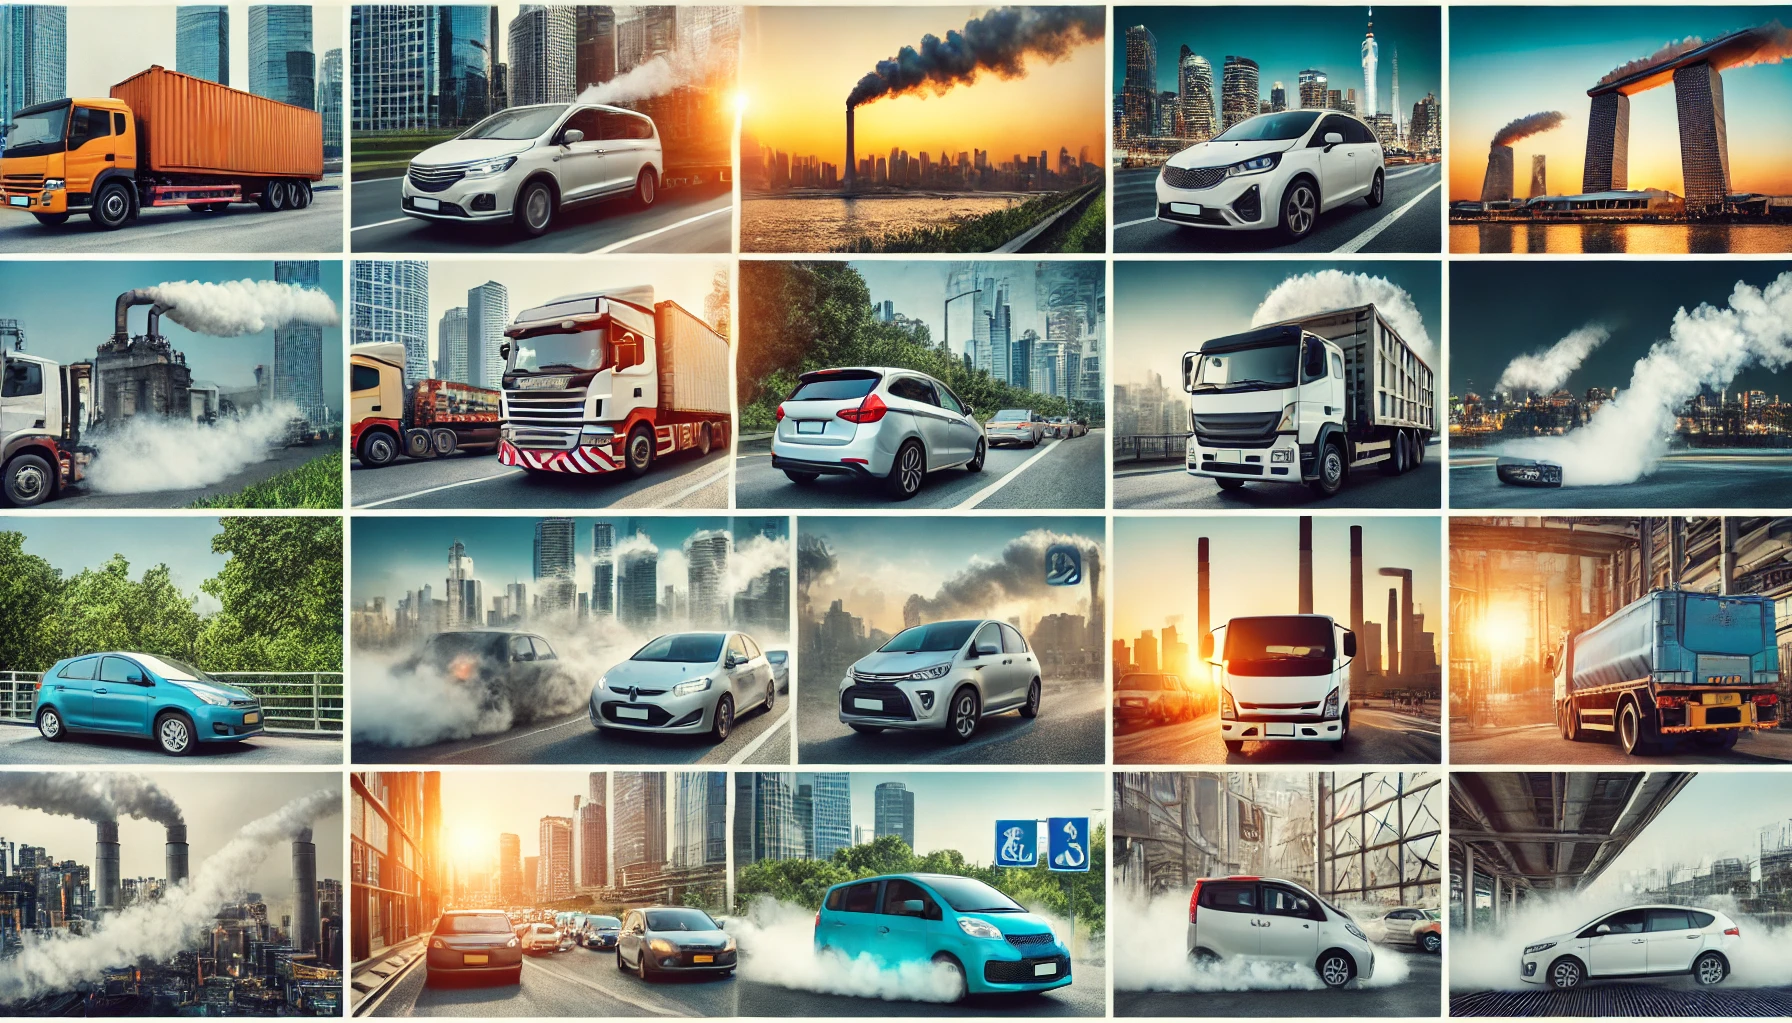

<div style="padding:15px;color:#FFFFFF;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:#007BFF;letter-spacing:1px;overflow:hidden"><b>  CO2 Emission Project</b></div>
<div style="text-align: center;">
  <b>If you want to be the first to be informed about new projects, please do not forget to follow us - by Ömer Yıldız</b><br>
  <a href="https://vscodefirstrepo.vercel.app/" style="color:#FFFFFF;background-color:#007BFF;padding:10px 20px;border-radius:5px;text-decoration:none;display:inline-block;margin:5px;">Ömeryildiz.com</a>
  <a href="https://www.linkedin.com/in/%C3%B6mery%C4%B1ld%C4%B1z-/" style="color:#FFFFFF;background-color:#007BFF;padding:10px 20px;border-radius:5px;text-decoration:none;display:inline-block;margin:5px;">Linkedin</a>
  <a href="https://github.com/omerryldzz" style="color:#FFFFFF;background-color:#007BFF;padding:10px 20px;border-radius:5px;text-decoration:none;display:inline-block;margin:5px;">Github</a>
  <a href="https://kaggle.com/omeryldz4034" style="color:#FFFFFF;background-color:#007BFF;padding:10px 20px;border-radius:5px;text-decoration:none;display:inline-block;margin:5px;">Kaggle</a>
  <a href="https://public.tableau.com/app/profile/omerryldzz4034/viz/" style="color:#FFFFFF;background-color:#007BFF;padding:10px 20px;border-radius:5px;text-decoration:none;display:inline-block;margin:5px;">Tableau</a>
</div>
<body style="background: linear-gradient(135deg, #f06, #ffab23);">

# <font color='green'> <b> Libraries and Data Information </b><font color='black'>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

# <font color='green'> <b> The data set includes information about </b><font color='black'>

 

- This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. 

- The dataset has been taken from Canada Government official open data website. This is a compiled version.

- This contains data over a period of 7 years. There are total 7385 rows and 12 columns. 

# <font color='green'> <b> Feature Information </b><font color='black'>

 

**Make:** Vehicle brand

**Model:** Vehicle model
- 4WD/4X4 = Four-wheel drive

- AWD = All-wheel drive

- FFV = Flexible-fuel vehicle

- SWB = Short wheelbase

- LWB = Long wheelbase

- EWB = Extended wheelbase


**Vehicle Class:** Vehicle class (e.g. small car, sports car, van, etc.)

**Engine Size (L):** Vehicle engine displacement (in liters)

**Cylinders:** Number of vehicle cylinders

**Transmission:** Vehicle gearbox type (manual or automatic)
- A = Automatic

- AM = Automated manual

- AS = Automatic with select shift

- AV = Continuously variable

- M = Manual

- 3 - 10 = Number of gears

**Fuel Type:** Type of fuel used (e.g. gasoline, diesel, hybrid, etc.)
- X = Regular gasoline

- Z = Premium gasoline

- D = Diesel

- E = Ethanol (E85)

- N = Natural gas

**Fuel Consumption City (L/100 km):** Fuel consumption city (liters/100 km)

**Fuel Consumption Hwy (L/100 km):** Hwy fuel consumption (liters/100 km)

**Fuel Consumption Comb (L/100 km):** Average fuel consumption (liters/100 km)

**Fuel Consumption Comb (mpg):** Fuel economy (miles per gallon)
- City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

**CO2 Emissions (g/km):** CO2 emissions per vehicle (grams/kilometer)

# <font color='green'> <b> Read and Check Data </b><font color='black'> 

# Read and Check Data

In [ ]:
co2 = pd.read_csv("co2.csv")
df = co2.copy()
df.head()

NameError: name 'pd' is not defined

NameError: name 'pd' is not defined

In [ ]:
# information about data frame
df.info()

In [ ]:
# let's edit column names
renamed_columns = {
    'Make' : "make",
    'Model' : "model",
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': "cylinders",
    'Transmission' : "transmission",
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_columns, axis='columns', inplace=True)

In [ ]:
# let's check our missing values
df.isnull().sum()

In [ ]:
# describe basic statistics of data
df.describe().T

In [ ]:
# Let's observe our data in a table 

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [ ]:
get_unique_values(df)

- The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.
- The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.

In [ ]:
# Duplicated data

df_duplicated = df[df.duplicated() == True]
df_duplicated.shape

* There are duplicate rows in the data set. However, since I will be using a linear model, I do not plan to delete these rows because duplicate rows contain similar values. Linear regression tries to find the general trend of the data points and the fact that duplicate rows contain similar values does not lead to a major change in the model's predictions.

# <font color='green'> <b> Categorical Features</b><font color='black'>
 

* Let's look at the distribution of our categorical characteristics with a bar graph

In [ ]:
def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
cat_features = ['make', 'vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']

plot_bar_graphs(df, cat_features)

As can be seen from the graphs above:

* The number of vehicles consuming diesel, ethanol and natural gas fuel in the data set is very small.
* Widespread use of AS6, AS8, M6, A6, A9 as transmission options
* 4, 6, 8 are commonly used as cylinders option
* Engine Size (L) with 2.0 and 3.0 options in density
* The dataset is generally dominated by smaller sized vehicles

In [ ]:
# Let's look at the relationship between our categorical attributes and the target variable

def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        grouped_data = df.groupby(column)['co2'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='co2', ascending=False)
        ax = sns.barplot(x=column, y='co2', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Mean Co2 Emission', fontsize=15)
        plt.title(f'Mean Co2 Emission by {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
plot_bar_with_co2(df, cat_features)

As can be seen from the graphs above:

* Bugatti has the highest average Co2 emissions
* Large-volume vehicles have high CO2 emission averages
* C02 emission averages of high volume and cylinders engines are also high
* Ethanol is the fuel with the highest average CO2

 
# <font color='green'> <b>Numerical Features</b><font color='black'>

In [ ]:
def numerical_dist(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        sns.distplot(x=df[column])
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Distribution of {column}', fontsize=20)
        plt.show()
        
num_features = ['fuel_cons_city', 'fuel_cons_hwy','fuel_cons_comb', 'mpgfuel_cons_comb', 'co2']

numerical_dist(df, num_features)

In [ ]:
# Consumption of Highway and City

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="fuel_cons_hwy", kde=True, label = "Fuel Consumption in Highway",color = "orange")
sns.histplot(data=df, x="fuel_cons_city", kde=True, label = "Fuel Consumption in City")
plt.xlabel('Consumption (L/100 km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title(f'Histogram of Highway and City', fontsize=16)
plt.legend()
plt.show()


* As can be seen from the graph, fuel consumption on highways is higher


# <font color='green'> <b>Outliers Check</b><font color='black'>

In [ ]:
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(25,25))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3) 
        
    plt.tight_layout()
    
    plt.show()

* We do not intervene with outliers at the moment, but we can take action later according to the model's forecasting performance.

In [ ]:
df.columns

In [ ]:
df[df["fuel_cons_comb"] > 25 ]


# <font color='green'> <b>Correlation</b><font color='black'>

* Fuel Consumption Comb (mpg) is negatively correlated to all the features.
* All the other features are postively correlated with each other

In [ ]:
# We can look at our features more generally 
sns.pairplot(df)
plt.show()

* When we look at the distribution of our target variable with the other features, the linear relationship between them shows that our linear model will perform well.
* In fact, it is clear from the following table that I hope to get high predictions with only numeric columns without using any categorical columns
* For our model, we can choose the column fuel_cons_comb, which is the combination of city and highway in fuel consumption. The other two will cause multicollinearity. So we can choose the following numerical columns

-engine_size

-cylinders

-fuel_cons_comb

-mpgfuel_cons_comb


# <font color='green'> <b>Modelling</b><font color='black'>


# <font color='green'> <b>Simple Lineer Regression</b><font color='black'>


# <font color='green'> <b> Train-Test Split</b><font color='black'>

In [ ]:
X = df[["engine_size"]]
y = df["co2"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
for i in (X_train, X_test, y_train, y_test):
    print(i.shape)


# <font color='green'> <b> Manuel Lineer Regresyon</b><font color='black'>

In [ ]:
np.polyfit(X_train.engine_size, y_train, deg = 1)

In [ ]:
# y = b1 * X + b0

In [ ]:
b1, b0 = np.polyfit(X_train.engine_size, y_train, deg = 1)

In [ ]:
print("b1        :", b1)
print("b0        :", b0)

In [ ]:
y_pred_test = b1 * X_test + b0
y_pred_test

In [ ]:
y_pred_train = b1 * X_train + b0
y_pred_train

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    
print("Model testing performance: ")   
eval_metric(y_test, y_pred_test)

In [ ]:
print("Model training performance: ")
eval_metric(y_train, y_pred_train)

### LinearRegression (scikit learn)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

In [ ]:
lin_reg.coef_      # b1

In [ ]:
lin_reg.intercept_ # b0

In [ ]:
y_pred_test = lin_reg.predict(X_test)
y_pred_test

In [ ]:
y_pred_train = lin_reg.predict(X_train)
y_pred_train

In [ ]:
print("Model testing performance: ")
eval_metric(y_test, y_pred_test)

In [ ]:
print("Model training performance: ")
eval_metric(y_train, y_pred_train)

In [ ]:
# The difference between MAE and RMSE indicates outlier effect

In [ ]:
my_dict = {"Actual": y_test, "pred": y_pred_test, "residual": y_test - y_pred_test}
compare = pd.DataFrame(my_dict)
compare.head(20)

In [ ]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [ ]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Multiple Lineer Regression

### Train-Test Split

In [ ]:
df.columns

In [ ]:
X = df[["engine_size", "cylinders", "fuel_cons_comb", "mpgfuel_cons_comb"]]
y = df["co2"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape: {}\ny Test features shape: {}" 
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

### Multiple Lineer Regresyon

In [ ]:
multi_lin_reg = LinearRegression()

In [ ]:
multi_lin_reg.fit(X_train, y_train)

In [ ]:
y_pred = multi_lin_reg.predict(X_test)
y_train_pred = multi_lin_reg.predict(X_train)

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [ ]:
multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "multi")
multiple_linear

* As can be seen, high R2 scores were obtained with only 4 features.  (excluding categorical features)

### Cross Validation

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                                            'neg_root_mean_squared_error'], cv = 10)

In [ ]:
pd.DataFrame(scores, index = range(1, 11))

In [ ]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

* The fact that this score obtained after Cross Validation and Train-test score are compatible indicates that the model has generalization ability.

## Polynomial Features (degree = 5)

In [ ]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False) ## For döngüsü döndükçe degreemiz artıyor,
        poly_features = polynomial_converter.fit_transform(X)                        # bundan dolayı feature sayımız artıyor.
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1,d))

In [ ]:
poly(8)

In [ ]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [ ]:
# we select degree 5
poly_converter = PolynomialFeatures(degree = 5, include_bias=False)

degree=5 parametresi ile PolynomialFeatures, veri setinizdeki 4 sütunun beşinci dereceye kadar olan tüm kombinasyonlarını yaratır ve bu yeni özellikleri kullanarak modelinizi eğitir. Bu, modelin daha karmaşık ilişkileri yakalamasına olanak tanır, ancak aynı zamanda aşırı öğrenme (overfitting) riskini de artırabilir.

In [ ]:
poly_lin_reg = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_converter.fit_transform(X), y,
                                                    test_size = 0.2, random_state = 42)

In [ ]:
poly_lin_reg.fit(X_train, y_train)

In [ ]:
y_train_pred = poly_lin_reg.predict(X_train)
y_pred = poly_lin_reg.predict(X_test)

In [ ]:
poly_multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "poly(5)")
poly_multiple_linear

### poly(4)
<img src="poly(4).png">

In [ ]:
result = pd.concat([multiple_linear, poly_multiple_linear], axis=1)
result

In [ ]:
poly_lin_reg = LinearRegression()
visualizer = ResidualsPlot(poly_lin_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [ ]:
poly_lin_reg = LinearRegression()
visualizer = PredictionError(poly_lin_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Polynomial Features (degree = 6)

In [ ]:
# select degree 6 to see the regulation operations
poly_converter2 = PolynomialFeatures(degree = 5, include_bias=False)

In [ ]:
poly_lin_reg2 = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_converter2.fit_transform(X), y,
                                                    test_size = 0.2, random_state = 42)

In [ ]:
poly_lin_reg2.fit(X_train, y_train)

In [ ]:
y_train_pred = poly_lin_reg2.predict(X_train)
y_pred = poly_lin_reg2.predict(X_test)

In [ ]:
poly_multiple_linear6 = train_val(y_train, y_train_pred, y_test, y_pred, "poly(6)")
poly_multiple_linear6

### Model Complexity
<img src="adsız.png">

In [ ]:
result = pd.concat([result, poly_multiple_linear6], axis=1)
result

* We have created overfitting with degree 6 so we can use ridge, lasso and elastic net models. Before using these models we need to standardize 

### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [ ]:
X_train.shape

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled 

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled 

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1, random_state=42)

In [ ]:
ridge_model.fit(X_train_scaled, y_train) 

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)        
y_train_pred = ridge_model.predict(X_train_scaled)

In [ ]:
ridge = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") 
ridge

In [ ]:
ridge_model.coef_[:20]

In [ ]:
result = pd.concat([result, ridge], axis=1)
result

### RidgeCV

In [ ]:
# Find the best alpha value with RidgeCV

alpha_space = np.linspace(0.01, 1, 100)
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")
ridge_cv_model.fit(X_train, y_train)

In [ ]:
ridge_cv_model.alpha_          # Best alpha value

In [ ]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [ ]:
ridge_cv = train_val(y_train, y_train_pred, y_test, y_pred, "ridgeCV")
ridge_cv

In [ ]:
ridge_cv_model.coef_[:20]          # Coefficients of insignificant variables approach zero

In [ ]:
ridge_model.coef_[:20]

In [ ]:
result = pd.concat([result, ridge_cv], axis=1)
result

## Lasso Regression

In [ ]:
lasso_model = Lasso(alpha = 1, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

In [ ]:
lasso_model.coef_             # As it is seen, the features with low importance are zero.

In [ ]:
nonzero_features = np.count_nonzero(lasso_model.coef_)         # non-zero coefficients  
nonzero_features

In [ ]:
result = pd.concat([result, lss], axis=1)
result

### LassoCV

In [ ]:
# Find the best alpha value with RidgeCV

lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=1000000, random_state=42)
lasso_cv_model.fit(X_train_scaled, y_train)

In [ ]:
lasso_cv_model.alpha_             # Best alpha value

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)           # Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lasso_cv = train_val(y_train, y_train_pred, y_test, y_pred, "lassoCV")
lasso_cv

* R2 score increased with coefficient increase 

In [ ]:
lasso_cv_model.coef_ 

In [ ]:
nonzero_features = np.count_nonzero(lasso_cv_model.coef_)         # non-zero coefficients  
nonzero_features

In [ ]:
result = pd.concat([result, lasso_cv], axis=1)
result

## ElasticNet Regression

In [ ]:
elastic_model = ElasticNet(alpha = 1, l1_ratio = 0.5, random_state = 42)
elastic_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
elastic = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
elastic

In [ ]:
elastic_model.coef_

In [ ]:
result = pd.concat([result, elastic], axis=1)
result

### ElasticNET CV

In [ ]:
# Find the best alpha and l1_ratio values

elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, 
                                max_iter = 1000000,random_state=42)

In [ ]:
elastic_cv_model.fit(X_train_scaled, y_train)

In [ ]:
elastic_cv_model.alpha_          # Best alpha value

In [ ]:
elastic_cv_model.l1_ratio_       # Best l1_ratio value (l1_ratio : ridge as it approaches 0, lasso as it approaches 1)

In [ ]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [ ]:
elastic_cv = train_val(y_train, y_train_pred, y_test, y_pred, "elasticCV")
elastic_cv

In [ ]:
nonzero_features = np.count_nonzero(elastic_cv_model.coef_)         # non-zero coefficients  
nonzero_features                                                    # same coefficient as lassoCV (28)

In [ ]:
result = pd.concat([result, elastic_cv], axis=1)   
result

In [ ]:
result.T

* lassoCV and elasticCV have the same R2 scores  (because elasticCV l1_ratio parameter is 1)

## Grid Search

* l1 = LASSO

* l2 = RIDGE

* l1 = 05 = lasso + ridge

* Let's do with GridSearch what we did with elasticCV

In [ ]:
elastic_model = ElasticNet(max_iter=100000, random_state=42)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, 
                          param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error',
                          cv =5, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

In [ ]:
# I interrupted GridSearch because it takes too much time 

In [ ]:
grid_model.best_params_ 

In [ ]:
grid_model.best_index_                # Let's access the index number of the best candidate

In [ ]:
grid_model.best_score_

In [ ]:
best_model = grid_model.best_estimator_  # Modeli tanımladık

In [ ]:
best_model.coef_    # Katsayıları getirir

### Using Best Hyper Parameters From GridSearch

In [ ]:
y_pred = grid_model.predict(X_test_scaled)          # ElasticNet(alpha= 0.01, l1_ratio= 1)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
gridsearch = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gridsearch

In [ ]:
result = pd.concat([result, gridsearch], axis=1)   
result

## Final Model

In [ ]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_converter2.fit_transform(X))

In [ ]:
final_model = Lasso(alpha=0.01)      # Lasso model built over 28 features with our best alpha value 

In [ ]:
final_model.fit(X_scaled, y)

* Continuing with polynomial features degree 6, the best score (test = 0.9290) is LassoCV with 28 features (alpha= 0.01)

* Continuing with polynomial features degree 5, the best score (test = 0.9502) is Multiple Linear Regression with 125 features.

## Feature importances with Ridge

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz  ## figsize gibi işlem yapıyor

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

## Feature importances with Lasso

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

<div style="padding:15px;color:#FFFFFF;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color:#007BFF;letter-spacing:1px;overflow:hidden"><b>THANK YOU</b></div>
<div style="text-align: center;">
  
  <a href="https://vscodefirstrepo.vercel.app/" style="color:#FFFFFF;background-color:#007BFF;padding:10px 20px;border-radius:5px;text-decoration:none;display:inline-block;margin:5px;">Ömeryildiz.com</a>
  <a href="https://www.linkedin.com/in/%C3%B6mery%C4%B1ld%C4%B1z-/" style="color:#FFFFFF;background-color:#007BFF;padding:10px 20px;border-radius:5px;text-decoration:none;display:inline-block;margin:5px;">Linkedin</a>
  <a href="https://github.com/omerryldzz" style="color:#FFFFFF;background-color:#007BFF;padding:10px 20px;border-radius:5px;text-decoration:none;display:inline-block;margin:5px;">Github</a>
  <a href="https://kaggle.com/omeryldz4034" style="color:#FFFFFF;background-color:#007BFF;padding:10px 20px;border-radius:5px;text-decoration:none;display:inline-block;margin:5px;">Kaggle</a>
  <a href="https://public.tableau.com/app/profile/omerryldzz4034/viz/" style="color:#FFFFFF;background-color:#007BFF;padding:10px 20px;border-radius:5px;text-decoration:none;display:inline-block;margin:5px;">Tableau</a>